-> Chargement des librairies et fonctions

In [8]:
# #Montage Drive

# from google.colab import drive
# import sys

# drive.mount('/content/gdrive')

# my_local_drive = "/content/gdrive/MyDrive/Perso/Etudes/Master\ ICo/Colab\ Notebooks/"
# # Ajout du path pour les librairies, fonctions et données
# sys.path.append(my_local_drive)
# # Se positionner sur le répertoire associé
# %cd $my_local_drive
# %pwd 

# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *
# fonctions utilities (fonction de clean, import etc etc)
from Fonction.myFonction import *

from Fonction.AllModels_pretraitement_first import *


-> Chargement des données brutes

In [2]:
# Init_train = pd.read_csv('./Data_brut/HAI817_Projet_train.csv', sep=",")
# Init_test = pd.read_csv('./Data_brut/HAI817_Projet_test.csv', sep=",")
# data_brute = pd.concat([Init_train,Init_test], ignore_index = True)
# data_brute = data_brute.drop_duplicates()
# print(data_brute['our rating'].value_counts())
# data_equilibre = balanceSample(data_brute,150,["false","true","mixture","other"])
# print(data_equilibre['our rating'].value_counts())
# data_equilibre.to_csv('./Data_equilibre/MyData_Sprint1.csv', sep=',', index=False)
mySample = pd.read_csv('./data_csv/balanced_concat.csv')

print(mySample['our rating'].value_counts())
X_train = mySample['text']
y_train = mySample['our rating']

True     500
False    500
Name: our rating, dtype: int64


-> Je test tout les models

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Evaluation de  MultinomialNB
MultinomialNB : 0.758 (0.065) in 2.072 s
Evaluation de  LR
LR : 0.784 (0.049) in 19.481 s
Evaluation de  KNN
KNN : 0.668 (0.041) in 5.990 s
Evaluation de  CART
CART : 0.708 (0.027) in 26.919 s
Evaluation de  RF
RF : 0.794 (0.037) in 31.376 s
Evaluation de  SVM
SVM : 0.820 (0.029) in 239.030 s

Le meilleur resultat : 
Classifier :  SVM  accuracy : 0.820  (0.029)  en 239.030   s

Tous les résultats : 

Classifier :  SVM  accuracy : 0.820  (0.029)  en 239.030   s
Classifier :  RF  accuracy : 0.794  (0.037)  en 31.376   s
Classifier :  LR  accuracy : 0.784  (0.049)  en 19.481   s
Classifier :  MultinomialNB  accuracy : 0.758  (0.065)  en 2.072   s
Classifier :  CART  accuracy : 0.708  (0.027)  en 26.919   s
Classifier :  KNN  accuracy : 0.668  (0.041)  en 5.990   s


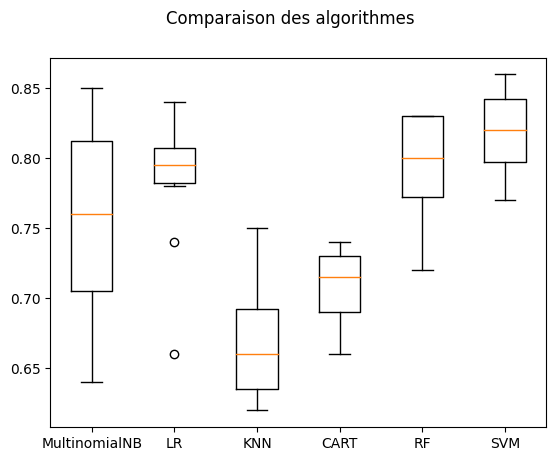

In [ ]:
testAllModel(X_train,y_train,5)

-> je test les hyper-parametres de SVC

In [9]:
testSVC(X_train,y_train)

Application de gridsearch ...
pipeline : ['tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits


ValueError: Invalid parameter cleaner for estimator Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svm', SVC())]). Check the list of available parameters with `estimator.get_params().keys()`.

-> Ajuster pretraitement

In [ ]:
ajustSVC(X_train, y_train,[10],[1],['rbf','linear']) #removedegit,getlem,stopword,lwc

[nltk_data] Error loading omw-1.4: <urlopen error [SSL:
[nltk_data]     CERTIFICATE_VERIFY_FAILED] certificate verify failed:
[nltk_data]     certificate has expired (_ssl.c:997)>


Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'svm']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False], 'svm__C': [10], 'svm__gamma': [1], 'svm__kernel': ['rbf', 'linear']}
Fitting 5 folds for each of 32 candidates, totalling 160 fits
réalisé en  124.755 s
Meilleur résultat : 0.488
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: True
	cleaner__removedigit: False
	svm__C: 10
	svm__gamma: 1
	svm__kernel: 'rbf'
	tfidf__lowercase: False
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  svm__C  svm__gamma  \
11                       True                 False      10           1   
3                        True                  True      10           1   
25                      False                 False      10           1   
17                      False                  True      

-> enregistrement du modele SVC

Sauvegarde du modèle dans  ./Modele/Sprint1/SentimentModel_Sprint1.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(getlemmatisation=True)),
                ('tfidf', TfidfVectorizer(lowercase=False)),
                ('svm', SVC(C=10, gamma=1))])
Accuracy : 0.433
Classification Report
              precision    recall  f1-score   support

       false    0.40000   0.30769   0.34783        13
     mixture    0.27778   0.33333   0.30303        15
       other    0.71429   0.71429   0.71429        14
        true    0.38889   0.38889   0.38889        18

    accuracy                        0.43333        60
   macro avg    0.44524   0.43605   0.43851        60
weighted avg    0.43944   0.43333   0.43445        60



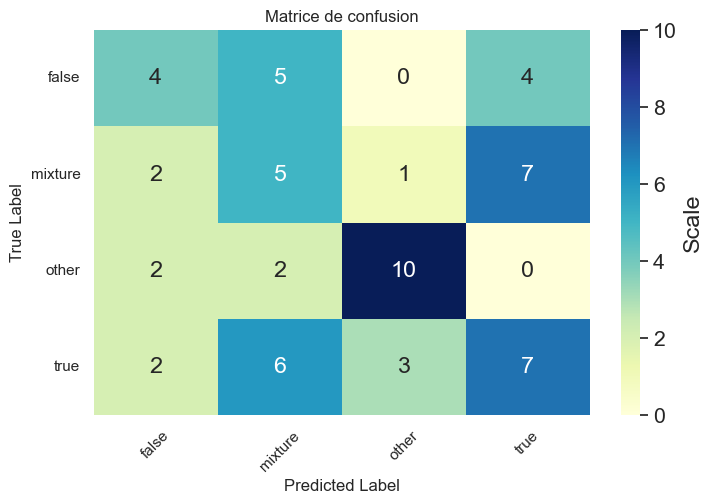

In [ ]:
from sklearn.model_selection import train_test_split
import pickle
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30

train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=False, getlemmatisation=True)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words=None)),
    ('svm', SVC(C=10, gamma=1, kernel='rbf'))
])
pipeline.fit(train_title,train_note)
filename='./Sprint2/SentimentModel_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))


print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Second Modèle

In [4]:
testRFC(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  80.010 s
Meilleur résultat : 0.783
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	tfidf__lowercase: True
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  tfidf__lowercase  \
8                       False                  True              True   
13                      False                 False              True   
9                       False                  True              True   
10                      False                  True             False   
11                      False                  True             False   

   tfidf__stop_words  accuracy  

In [6]:
ajustRFC(X_train, y_train,[True,False],[False],['english',None],[True]) #removedigit,getlem,stopword,lwc

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'rfc']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True], 'rfc__n_estimators': [500, 1200], 'rfc__max_depth': [25, 30], 'rfc__min_samples_split': [5, 10, 15], 'rfc__min_samples_leaf': [1, 2]}
Fitting 5 folds for each of 96 candidates, totalling 480 fits
réalisé en  580.455 s
Meilleur résultat : 0.791
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	rfc__max_depth: 25
	rfc__min_samples_leaf: 1
	rfc__min_samples_split: 15
	rfc__n_estimators: 500
	tfidf__lowercase: True
	tfidf__stop_words: None

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  rfc__max_depth  \
9                       False                  True              25   
75                      False                 False              30   
81                      False             

Sauvegarde du modèle dans  ./Sprint2/RandomForestClassifier_Sprint2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf', TfidfVectorizer()),
                ('rfc',
                 RandomForestClassifier(max_depth=25, min_samples_split=15,
                                        n_estimators=500))])
Accuracy : 0.820
Classification Report
              precision    recall  f1-score   support

       False    0.82353   0.82353   0.82353        51
        True    0.81633   0.81633   0.81633        49

    accuracy                        0.82000       100
   macro avg    0.81993   0.81993   0.81993       100
weighted avg    0.82000   0.82000   0.82000       100



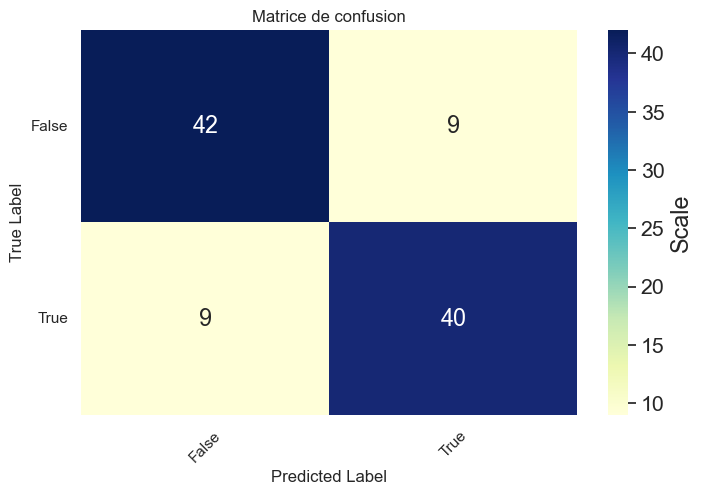

In [9]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=True, stop_words=None)),
    ('rfc', RandomForestClassifier(max_depth=25,min_samples_leaf=1, min_samples_split=15, n_estimators=500))
])
pipeline.fit(train_title,train_note)
filename='./Sprint2/RandomForestClassifier_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)

-> Le dernier modele

In [3]:
testLR(X_train,y_train)

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True, False], 'cleaner__getlemmatisation': [True, False], 'tfidf__stop_words': ['english', None], 'tfidf__lowercase': [True, False]}
Fitting 5 folds for each of 16 candidates, totalling 80 fits
réalisé en  86.228 s
Meilleur résultat : 0.786
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
     cleaner__getlemmatisation  cleaner__removedigit  tfidf__lowercase  \
10                      False                  True             False   
14                      False                 False             False   
2                        True                  True             False   
6                        True                 False             False   
8                       False                  True              True   

   tfidf__stop_words  accuracy  

In [4]:
ajustLR(X_train, y_train,[True],[False],['english'],[False]) #removedigit,getlem,stopword,lwc

Application de gridsearch ...
pipeline : ['cleaner', 'tfidf', 'lr']
parameters :
{'cleaner__removedigit': [True], 'cleaner__getlemmatisation': [False], 'tfidf__stop_words': ['english'], 'tfidf__lowercase': [False], 'lr__solver': ['newton-cg', 'lbfgs', 'liblinear'], 'lr__penalty': ['l2'], 'lr__C': [100, 10, 1.0, 0.1, 0.01]}
Fitting 5 folds for each of 15 candidates, totalling 75 fits
réalisé en  52.468 s
Meilleur résultat : 0.824
Ensemble des meilleurs paramètres :
	cleaner__getlemmatisation: False
	cleaner__removedigit: True
	lr__C: 100
	lr__penalty: 'l2'
	lr__solver: 'liblinear'
	tfidf__lowercase: False
	tfidf__stop_words: 'english'

Les premiers résultats : 
    cleaner__getlemmatisation  cleaner__removedigit  lr__C lr__penalty  \
2                      False                  True  100.0          l2   
0                      False                  True  100.0          l2   
1                      False                  True  100.0          l2   
3                      False          

Sauvegarde du modèle dans  ./Sprint2/LogisticRegression_Sprint2.pkl
Chargement du modèle 

Pipeline(steps=[('cleaner', TextNormalizer(removedigit=True)),
                ('tfidf',
                 TfidfVectorizer(lowercase=False, stop_words='english')),
                ('lr', LogisticRegression(C=100, solver='liblinear'))])
Accuracy : 0.850
Classification Report
              precision    recall  f1-score   support

       False    0.84615   0.86275   0.85437        51
        True    0.85417   0.83673   0.84536        49

    accuracy                        0.85000       100
   macro avg    0.85016   0.84974   0.84986       100
weighted avg    0.85008   0.85000   0.84995       100



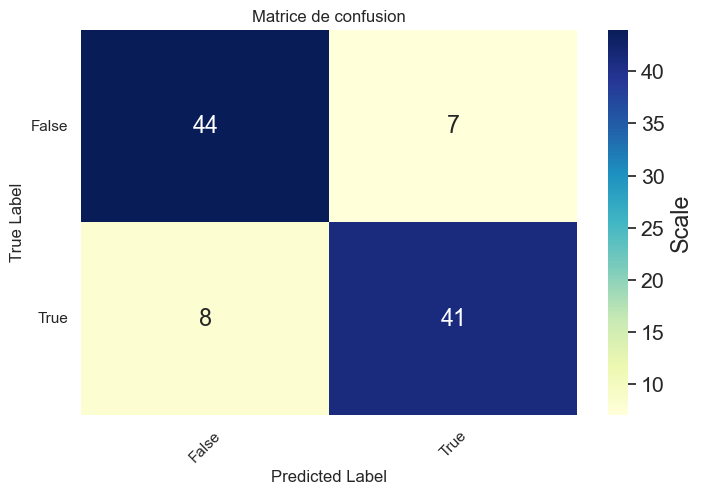

In [6]:
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
# Création d'un jeu d'apprentissage et de test
trainsize=0.9 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour
testsize= 0.1
seed=30
train_title,test_title,train_note,test_note=train_test_split(X_train,y_train, train_size=trainsize,random_state=seed,test_size=testsize)

pipeline=Pipeline([
    ("cleaner", TextNormalizer(removedigit=True, getlemmatisation=False)),
    ("tfidf", TfidfVectorizer(lowercase=False, stop_words='english')),
    ('lr', LogisticRegression(C=100,penalty='l2', solver='liblinear'))
])
pipeline.fit(train_title,train_note)
filename='./Sprint2/LogisticRegression_Sprint2.pkl'
print("Sauvegarde du modèle dans ", filename)
pickle.dump(pipeline, open(filename, "wb"))



print ("Chargement du modèle \n")
# le chargement se fait via la fonction load
clf_loaded = pickle.load(open(filename, 'rb'))
# affichage du modèle sauvegardé
print (clf_loaded)


# test  avec les données qu'il a apprise c'est parfait woahhha c'est beau
y_pred = clf_loaded.predict(test_title)
# autres mesures et matrice de confusion
MyshowAllScores(test_note,y_pred)